# Philadelphia
The City that sleeps at 2am  
It is always sunny there  
Birthplace of America and home of the Cheesesteak  
### But which neighborhood is best to open a restranut in?

In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests 
import pandas as pd 
import numpy as np 
import random 
 
from geopy.geocoders import Nominatim

from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from folium import plugins

from IPython.display import display_html
import json
from folium import plugins

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install folium
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
!conda install -c conda-forge folium=0.5.0 --yes 

import folium

from pandas.io.json import json_normalize 
from folium.plugins import MarkerCluster

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=2020
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2020
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
done

# All requested packages already installed.

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=2020
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2020
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
done

# All requested packages already installed.



In order to find where to place a restaurant we need to know how many potential customers live nearby and how much money each customer may have to spend on dinning out.  
Below I will input the data into a DataFrame and then clean the data by dropping extra rows and columns, and renaming the columns to fit the data.  
I will name this DataFrame PI for Philadelphia Income.

In [2]:
source = requests.get('https://docs.google.com/spreadsheets/d/1FaajyUmb-QUVYIwpXWnQIfd_hS2NkZEl4_PNHzGif-k/edit?usp=sharing').text
Income=BeautifulSoup(source,'lxml')
tab = str(Income.table)
dfs = pd.read_html(tab)
df=dfs[0]
df=df.rename(columns={"A": "Zip Code", "B": "Location", "C": "City", "D": "Population", "E": "Avg. Income", "F": "Income National Rank"})
df=df.drop([0])
df=df.drop(['Unnamed: 0'], axis=1)
df=df.dropna(how='all', axis='columns')
df=df.dropna()
PI = df.astype({'Zip Code': 'str', 'Location': 'str', 'City': 'str', 'Population': 'int', 'Avg. Income': 'float', 'Income National Rank': 'str'})
PI.head()

,Zip Code,Location,City,Population,Avg. Income,Income National Rank
1,19113,"39.870679, -75.247782","Philadelphia, Pennsylvania",136,70833.0,"#1,450"
2,19106,"39.950472, -75.147231","Philadelphia, Pennsylvania",8359,61720.0,"#2,617"
3,19118,"40.072443, -75.212415","Philadelphia, Pennsylvania",9608,60179.0,"#2,986"
4,19154,"40.095521, -74.981818","Philadelphia, Pennsylvania",35606,51949.0,"#5,075"
5,19119,"40.052013, -75.192553","Philadelphia, Pennsylvania",28873,46520.0,"#7,487"


In [3]:
PI.dtypes

Zip Code                 object
Location                 object
City                     object
Population                int64
Avg. Income             float64
Income National Rank     object
dtype: object

###### Below find a map of the Philadelphia with the zip codes earning the smaller average incomes per a month in green and zip codes with a higher average income in blue

In [4]:
ph_neighborhood_geo = 'https://opendata.arcgis.com/datasets/b54ec5210cee41c3a884c9086f7af1be_0.geojson'

In [5]:
PH_map = folium.Map(location=[39.9526, -75.1652], zoom_start=11)

In [6]:
PH_map.choropleth(
    geo_data=ph_neighborhood_geo,
    data=PI,
    columns=['Zip Code', 'Avg. Income'],
    key_on= 'feature.properties.CODE',
    fill_color='GnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Income by Zip Code'
)
PH_map

Next I will show the number of restaurants (competition) per each zip code

In [7]:
CLIENT_ID = '50WW2W2OFSPFNHI1XLICIS55YL4GSLVEE4WEJ1F5B5U1ONDB'
CLIENT_SECRET = '01GPHSQUPPYPILM2GD30CZ4CMK33CWVIKTUTRKAWBGRXEPWC'
VERSION = '20180604'
LIMIT = 100
radius = 500
LATITUDE = 40.0541
LONGITUDE = -75.1399

In [8]:
url = 'https://api.foursquare.com/v2/venues/explore?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LATITUDE, 
    LONGITUDE, 
    radius, 
    LIMIT)
results = requests.get(url).json()

In [9]:
venues = results['response']['groups'][0]['items']
RS = pd.json_normalize(venues)

In [10]:

filtered_columns = ['venue.name', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']
RS =RS.loc[:, filtered_columns]

RS.columns = [col.split(".")[-1] for col in RS.columns]


In [11]:
RS = RS.astype({'name': 'str', 'address': 'str', 'lat': 'str', 'lng': 'str'})
RS['lat and lng']=RS['lat'] + [','] + RS['lng']
RS.head()

,name,address,lat,lng,lat and lng
0,Corfu Pizza,6730 Old York Rd,40.05589759118875,-75.14040103529868,"40.05589759118875,-75.14040103529868"
1,Dunkin',6620 N Broad St,40.05432892444655,-75.14185953510207,"40.05432892444655,-75.14185953510207"
2,Top Star Chinese Restaurant,6708 N Broad St,40.055565,-75.141463,"40.055565,-75.141463"
3,Pizza Point,6501 N Broad Sy,40.05239907499958,-75.14164602813425,"40.05239907499958,-75.14164602813425"
4,Ho Ho Food Mark,6800 N Broad St,40.05686,-75.14111899999999,"40.05686,-75.14111899999999"


In [12]:
geolocator = Nominatim(user_agent="geoapiExercises")
RS ['Zip Code'] = RS['lat and lng'].apply(geolocator.reverse)

In [13]:
pd.set_option("max_rows", None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
RS

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  app.launch_new_instance()


,name,address,lat,lng,lat and lng,Zip Code
0,Corfu Pizza,6730 Old York Rd,40.05589759118875,-75.14040103529868,"40.05589759118875,-75.14040103529868","(Hope Church School, Old York Road, Pittville, Philadelphia, Philadelphia County, Pennsylvania, 19126, United States, (40.0555168, -75.1402941))"
1,Dunkin',6620 N Broad St,40.05432892444655,-75.14185953510207,"40.05432892444655,-75.14185953510207","(Dunkin' Donuts, Old York Road, Pittville, Philadelphia, Philadelphia County, Pennsylvania, 19126, United States, (40.05432605, -75.14185574999999))"
2,Top Star Chinese Restaurant,6708 N Broad St,40.055565,-75.141463,"40.055565,-75.141463","(Fern Rock Community Church, North Broad Street, Pittville, Philadelphia, Philadelphia County, Pennsylvania, 19126, United States, (40.0556316, -75.1413187))"
3,Pizza Point,6501 N Broad Sy,40.05239907499958,-75.14164602813425,"40.05239907499958,-75.14164602813425","(6519, North Broad Street, Pittville, Philadelphia, Philadelphia County, Pennsylvania, 19126, United States, (40.05245879164711, -75.1418977373496))"
4,Ho Ho Food Mark,6800 N Broad St,40.05686,-75.14111899999999,"40.05686,-75.14111899999999","(68th Avenue, Pittville, Philadelphia, Philadelphia County, Pennsylvania, 19126, United States, (40.056727230496094, -75.14113564704905))"
5,Super Swarm Sunday,nan,40.053720637306455,-75.14387506255683,"40.053720637306455,-75.14387506255683","(1538, 66th Avenue, Pittville, Philadelphia, Philadelphia County, Pennsylvania, 19126, United States, (40.05381591836735, -75.14385302040816))"
6,popyes,nan,40.05242584319388,-75.14333918503668,"40.05242584319388,-75.14333918503668","(Carmelite Monastery, Old York Road, Pittville, Philadelphia, Philadelphia County, Pennsylvania, 19126, United States, (40.052790200000004, -75.14286419953211))"
7,Great Wall Chinese,6351 N Broad St,40.05036163330078,-75.14185333251953,"40.05036163330078,-75.14185333251953","(1398, Chelten Avenue, East Oak Lane, Philadelphia, Philadelphia County, Pennsylvania, 19126, United States, (40.050314, -75.140907))"


Now I will move the data to sequel server to show that I can also manipulate data in SQL

Duplicates need to be removed
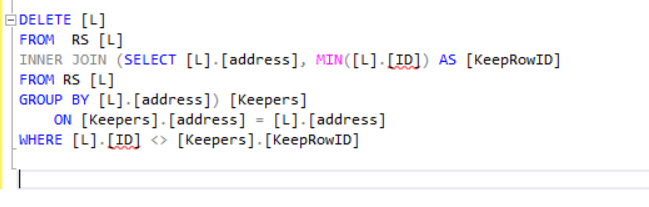

Next I need to write a function to isolate the data in the Zip Code column from GeoPy into its component parts so I can extract just the zip code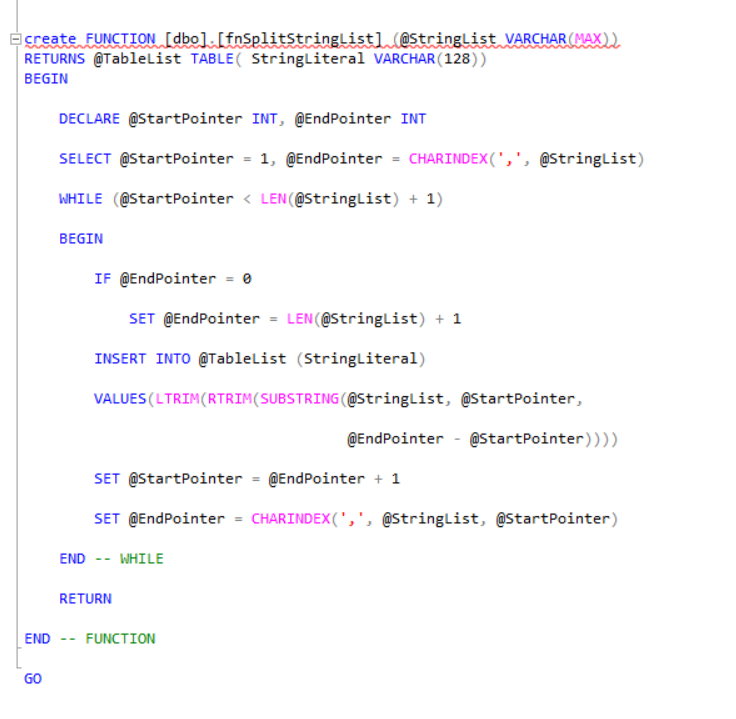

Finally select only the rows with zip code information
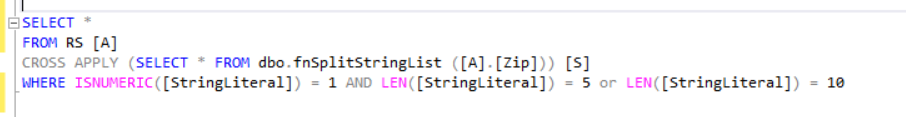

Import the data back into the notebook

In [14]:
source = requests.get('https://docs.google.com/spreadsheets/d/1UITz2sGD9PBqRouqKBkj4aiSONR1SDQKJd_FwE_l4ho/edit?usp=sharing').text
Income=BeautifulSoup(source,'lxml')
tab = str(Income.table)
dfs = pd.read_html(tab)
df=dfs[0]
df=df.rename(columns={"A": "Zip Code", "B": "Count"})
df=df.drop([0])
df=df.drop(['Unnamed: 0'], axis=1)
df=df.dropna(how='all', axis='columns')
RS=df.dropna()
RS.head()

,Zip Code,Count
1,18954,1.0
2,18966,1.0
3,18974,2.0
4,19001,1.0
5,19002,1.0


In [15]:
RS_neighborhood_geo = 'https://opendata.arcgis.com/datasets/b54ec5210cee41c3a884c9086f7af1be_0.geojson'
RS_map = folium.Map(location=[39.9526, -75.1652], zoom_start=11)

Below find a density map of restaurants per zip code

In [16]:
RS_map.choropleth(
    geo_data=ph_neighborhood_geo,
    data=RS,
    columns=['Zip Code', 'Count'],
    key_on= 'feature.properties.CODE',
    fill_color='BuPu', 
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Restaurant Density Per Zip Code'
)
RS_map


I will now join the two DataFrames (restaurantsand Philadelphia Income) by the column Zip Code

In [17]:
df=RS.join(PI.set_index('Zip Code'), on='Zip Code')
df=df.dropna(how='all', axis='columns')
df=df.dropna()
df.head()

,Zip Code,Count,Location,City,Population,Avg. Income,Income National Rank
35,19102,12.0,"39.953423, -75.165384","Philadelphia, Pennsylvania",4396.0,35625.0,"#16,711"
36,19103,51.0,"39.952795, -75.173949","Philadelphia, Pennsylvania",19714.0,37959.0,"#13,970"
37,19104,60.0,"39.960323, -75.197883","Philadelphia, Pennsylvania",50125.0,16151.0,"#31,267"
38,19106,9.0,"39.950472, -75.147231","Philadelphia, Pennsylvania",8359.0,61720.0,"#2,617"
39,19107,25.0,"39.951623, -75.158637","Philadelphia, Pennsylvania",12340.0,24448.0,"#28,539"


Below find a scatter plot of the income levels and count of restaurants per zip code

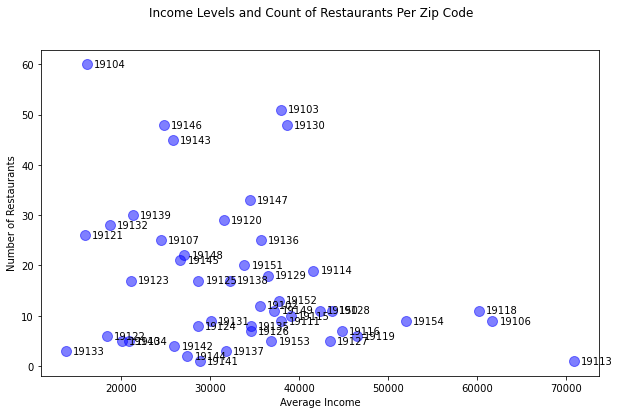

In [18]:
y =  df['Count']
x = df['Avg. Income']
labels = df['Zip Code']

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Income Levels and Count of Restaurants Per Zip Code')

plt.xlabel("Average Income")
plt.ylabel("Number of Restaurants")

ax.scatter(x, y,
           color="blue",  
           s=100,         
           alpha=0.5,     
           linewidths=1)  

for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             
                xy=(x_pos, y_pos), 
                xytext=(7, 0),     
                textcoords='offset points', 
                ha='left',         
                va='center')    

plt.show()

## As you can tell from this plot the best zip codes to open a restaurant would be 19113, 19106, 19118, and 19154.